# Gleitendes Zwei-Massen-System
Es wird die Aufgabe 4.1 aus Klepp: "Analytische Methoden" (Teil a) behandelt. Dieses Dokument betrachtet den Fall mit einem Freiheitsgrad. Es wird die Bewegungsgleichung hergeleitet und diese anschließend linearisiert. Beides erfolgt symbolisch.

## Systembeschreibung
Das System besteht aus zwei Massen m<sub>1</sub> und m<sub>2</sub>, die jeweils parallel zu einer der Koordinatenachsen gleiten können. Ihre Mittelpunkte sind durch eine masselose starre Stange der Länge l verbunden. Die Masse m<sub>1</sub> ist mit einer Feder verbunden, die parallel zur Bewegungsrichtung wirkt. Zusätzlich wirken Gewichtskräfte (in negativer y-Richtung). Als unabhängiger Freiheitsgrad ist der Winkel $\varphi$ gewählt, den die Stange mit der y-Achse bildet.

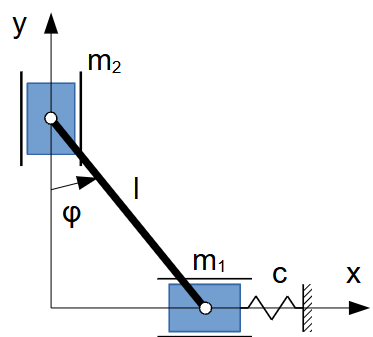
Bild 1: Systemskizze

## Aufstellen der Bewegungsgleichung
Zunächst werden die Variablen und Parameter definiert. Der Positionswinkel wird mit q bezeichnet.

In [19]:
from sympy import symbols, Matrix, sin, cos, trigsimp
from sympy.physics.mechanics import *

Vector.simplify = True
Matrix.simplify = True

q = dynamicsymbols('q')
qd = dynamicsymbols('q', 1)
qdd = dynamicsymbols('q2', 2)

l, m1, m2, g, c = symbols('l m1 m2 g c')

Dann werden Bezugspunkte definiert:
- O ist ein feststehender Punkt (Geschwindigkeit wird explizit null gesetzt)
- P1 ist der Mittelpunkt der Masse m<sub>1
- P2 ist der Mittelpunkt der Masse m<sub>2

In [20]:
N = ReferenceFrame('N') # inertial coordinate system

O = Point('O')
O.set_vel(N,0*N.x) # zero velocity (tbd as vector)

P1 = O.locatenew('P1', l * sin(q) * N.x)
P2 = O.locatenew('P2', l * cos(q) * N.y)

Anschließend werden die beiden Massen definiert.

In [21]:
ParM1 = Particle('ParM1', P1, m1)
ParM2 = Particle('ParM1', P2, m2)

Nun folgt die Bestimmung der Potentiale. Hier wirken beide Kräfte in negativer Koordinatenrichtung. Da eine Kraft die negative Ableitung des Potenzials ist, die Kräfte hier in negativer Koordinatenrichtung wirken sind die Potentiale positiv. Formal wird das Potential jeweils aus den Energieparametern und dem Skalarprodukt aus Richtungsvektoren gebildet (Potential ist ein Skalar). Diese müssen über den unabhängigen Freiheitsgrad beschrieben werden, wozu die in den Klassen der Punkte enthaltenen Koordinaten verwendet werden. Im Fall der Feder bestimmt der Vektor zum Mittelpunkt der Masse m<sub>1</sub> die Federkraft (entspannte Lage, wenn Masse im Koordinatenursprung liegt) und die Richtung und dann auch den Weg der Arbeit. Im Fall des Gewichtes ist der Koordinaten-Einheitsvektor parallel zur Kraftrichtung, der Weg der Arbeit wird wiederum vom Vektor zum Mittelpunkt der Masse bestimmt.

In [22]:
ParM1.potential_energy = 1/2 * c * dot(P1.pos_from(O),P1.pos_from(O))
ParM2.potential_energy = m2 * g * dot(N.y,P2.pos_from(O))

Mit diesen Definition kann die Lagrange-Gleichung bestimmt werden. Die Ausgabe erfolgt als herkömmliche Bewegungsgleichung sowie in Zustandsraumdarstellung.

In [23]:
L = Lagrangian(N, ParM1, ParM2)

lm = LagrangesMethod(L, [q], bodies=[ParM1, ParM2])
lm.form_lagranges_equations()

print('equations:')
vprint(lm.form_lagranges_equations())
print('mass matrix:')
vprint(lm.mass_matrix_full)
print('force matrix:')
vprint(lm.forcing_full)

equations:
Matrix([[1.0*c*l**2*sin(q)*cos(q) - g*l*m2*sin(q) - l**2*m1*sin(q)*cos(q)*q'**2 + l**2*m1*cos(q)**2*q'' + l**2*m2*sin(q)**2*q'' + l**2*m2*sin(q)*cos(q)*q'**2]])
mass matrix:
Matrix([
[1,                                     0],
[0, l**2*m1*cos(q)**2 + l**2*m2*sin(q)**2]])
force matrix:
Matrix([
[                                                                                                   q'],
[-1.0*c*l**2*sin(q)*cos(q) + g*l*m2*sin(q) + l**2*m1*sin(q)*cos(q)*q'**2 - l**2*m2*sin(q)*cos(q)*q'**2]])


## Linearisierung
Die Bewegungsgleichung wird bei $\varphi$=q=0 linearisiert und das Ergebnis in Zustandsraumdarstellung ausgegeben.

In [24]:
lm_lin = lm.to_linearizer(q_ind=[q], qd_ind=[qd])

op_point = {q: 0, qd: 0}

M, A, B = lm_lin.linearize(op_point=op_point)

print(' ')
print('linear mass matrix:')
vprint(M)
print('linear force matrix:')             
vprint(A)
print('linear matrix B:')  
vprint(B)

 
linear mass matrix:
Matrix([
[1,       0],
[0, l**2*m1]])
linear force matrix:
Matrix([
[                   0, 1],
[-1.0*c*l**2 + g*l*m2, 0]])
linear matrix B:
Matrix(0, 0, [])


Die lineare Lösung enthält praktisch nur Beiträge von der Masse m<sub>1</sub>, was insofern Sinn macht, da die Gewichtskraft der zweiten Masse an dem Linearisierungs-Punkt nur eine Führungskraft erzeugt, die in die Bewegungsgleichung aber nicht eingeht. Weiterhin bewegt sich die zweite Masse am Linearisierungspunkt kaum und hat damit einen vernachlässigbaren Einfluss auf die Systembewegung (bei großem Winkel $\varphi$ natürlich nicht mehr). Das Gewicht der Masse m<sub>2</sub> geht aber anteilig in die "resultierende" Federsteifigkeit ein und zwar wird die wirksame Steifigkeit reduziert. Das deutet eine Instabilität an: Wenn die resultierende Federsteifigkeit null oder negativ wird ist das System instabil. Dies wird erreicht, wenn $c*l<=g*m_2$. Bei großer Masse m<sub>2</sub> reicht die Federkraft dann offenbar nicht mehr aus, die Masse m<sub>2</sub> zu halten.
<br>Ggü. der originalen Bewegungsgleichung sind die Vorzeichen in der "force matrix" vertauscht, da diese auf der rechten Seite angesetzt wird. Das sieht man aber auch schon bei der Zustandsraumdarstellung der entsprechenden nichtlinearen Lösung.